In [1]:
import pandas as pd
import scanpy as sc

In [2]:
adata = sc.read_h5ad("./output/adata_v2.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 2730 × 1000
    obs: 'paul15_clusters', 'n_counts_all', 'louvain', 'louvain_anno', 'cell_type', 'dpt_pseudotime'
    var: 'n_counts', 'mean', 'std'
    uns: 'cell_type_colors', 'dendrogram_cell_type', 'diffmap_evals', 'draw_graph', 'iroot', 'log1p', 'louvain', 'louvain_anno_colors', 'louvain_anno_sizes', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'paul15_clusters_colors', 'pca', 'tsne'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Read the transition indicies
---

In [4]:
def read_tab_separated_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    data = []
    for line in lines:
        # Strip any surrounding whitespace and split by tabs
        numbers = line.strip().split(', ')
        # Convert the strings to integers or floats
        numbers = [str(int(num)) for num in numbers]
        data.append(numbers)
    
    return data

transition_indicies_filepath = './data/transition_indices.txt'
data_cell_indicies = read_tab_separated_file(transition_indicies_filepath)


In [5]:
data_cell_indicies[0]

['56',
 '233',
 '266',
 '998',
 '1156',
 '1379',
 '1497',
 '1659',
 '2063',
 '2266',
 '2315',
 '2464',
 '2637']

### Read the cell pairs file

In [6]:
def read_tab_separated_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
    data = []
    for line in lines:
        # Strip any surrounding whitespace and split by tabs
        cells = line.strip().split(', ')
        # Convert the strings to integers or floats
        cells = [str(cell) for cell in cells]
        data.append(cells)
    
    return data

cell_pairs_filepath = './data/cell_pairs.txt'
data_cell_pairs = read_tab_separated_file(cell_pairs_filepath)

In [7]:
data_cell_pairs

[['Ery0', 'Ery1'],
 ['Ery1', 'Ery3'],
 ['HPC', 'Monocyte Progenitor'],
 ['Ery3', 'Ery4'],
 ['HPC', 'Monocyte Progenitor', 'Neutrophils'],
 ['Ery0', 'Ery2', 'Ery3', 'Ery4'],
 ['Ery0', 'Ery4'],
 ['Monocyte Progenitor', 'Neutrophils'],
 ['Early Progenitor', 'HPC'],
 ['HPC', 'Neutrophils'],
 ['Early Progenitor', 'Ery4'],
 ['Ery4', 'Mep'],
 ['Ery0', 'Ery2', 'Ery4'],
 ['Ery0', 'Ery3', 'Ery4'],
 ['Basophil', 'HPC'],
 ['Basophil', 'Neutrophils'],
 ['Ery4', 'HPC', 'Neutrophils'],
 ['Ery2', 'Ery4'],
 ['Ery0', 'Mep'],
 ['Ery0', 'HPC', 'Neutrophils'],
 ['Basophil', 'HPC', 'Neutrophils'],
 ['HPC', 'Lymph'],
 ['Ery0', 'HPC', 'Monocyte Progenitor', 'Neutrophils'],
 ['Ery0', 'Ery3'],
 ['Ery0', 'HPC'],
 ['Ery0', 'Monocyte Progenitor', 'Neutrophils'],
 ['DC', 'HPC']]

In [8]:
for idx in range(len(data_cell_indicies)):
    if len(data_cell_indicies[idx]) > 7:
        print(f"idx: {data_cell_indicies[idx]}")
        print(f"hyb: {data_cell_pairs[idx]}")
        print("---"*30)

idx: ['56', '233', '266', '998', '1156', '1379', '1497', '1659', '2063', '2266', '2315', '2464', '2637']
hyb: ['Ery0', 'Ery1']
------------------------------------------------------------------------------------------
idx: ['195', '304', '1042', '1178', '1201', '1765', '1976', '2272', '2562']
hyb: ['Ery1', 'Ery3']
------------------------------------------------------------------------------------------
idx: ['242', '713', '2560', '1008', '2017', '2569', '1494', '1977', '2598', '1735', '2635', '2170', '2183', '64', '112', '523', '904', '1369', '1437', '1505', '1678', '2609', '2706']
hyb: ['Ery0', 'Ery4']
------------------------------------------------------------------------------------------
idx: ['265', '2599', '2642', '183', '2555', '410', '509', '567', '1283', '2347']
hyb: ['Monocyte Progenitor', 'Neutrophils']
------------------------------------------------------------------------------------------
idx: ['899', '2196', '2404', '1642', '2048', '2076', '583', '1547', '620', '2596'

Here we have a large set of cells for >7 for These cell Hybrids, Plot only those:
- Ery0-Ery1
- Ery1-Ery3
- Ery0-Ery4
- Monocyte Progenitor-Neutrophils
- HPC-Neutrophils

### Make a copy of cell_type column in obs dataframe and name it as cell_type_w_hybrids

In [9]:
adata.obs

paul15_clusters  n_counts_all louvain louvain_anno            cell_type  \
0               7MEP         353.0       8            8                 Ery4   
1               15Mo        2556.0       1            1  Monocyte Progenitor   
2               3Ery        4649.0      17           17                 Ery0   
3               15Mo        4486.0       2            2          Neutrophils   
4               3Ery        5205.0      17           17                 Ery0   
...              ...           ...     ...          ...                  ...   
2725            2Ery        4873.0       6            6                 Ery1   
2726          13Baso        3553.0      24        24/Mo  Monocyte Progenitor   
2727            7MEP         443.0       8            8                 Ery4   
2728            15Mo        3252.0       2            2          Neutrophils   
2729            3Ery        6401.0       3            3                 Ery0   

      dpt_pseudotime  
0           0.225547  
1           0.273524  
2           0.710179  
3           0.267904  
4           0.781939  
...              ...  
2725        0.649140  
2726        0.298521  
2727        0.196117  
2728        0.264164  
2729        0.762039  

[2730 rows x 6 columns]

In [10]:
adata.obs["cell_type_w_hybrids"] = adata.obs['cell_type']

In [11]:
assert len(data_cell_indicies) == len(data_cell_pairs)

In [12]:
for idx in range(len(data_cell_indicies)):
    indices = data_cell_indicies[idx]
    cell_types = data_cell_pairs[idx]
    cell_type_name_hyb = "-".join(cell_types) + "-Hybrid"
    adata.obs['cell_type_w_hybrids'].cat.add_categories(cell_type_name_hyb, inplace=True)
    # Rename the cell_type for the given indices to 'xyz'
    adata.obs.loc[indices, 'cell_type_w_hybrids'] = cell_type_name_hyb

/usr/local/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [13]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import rc_context

In [14]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
# low dpi (dots per inch) yields small inline figures
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3, 3), facecolor="white", color_map="viridis_r")

-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                 9.5.0
anyio               NA
arrow               1.2.3
attr                23.2.0
babel               2.14.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cached_property     1.5.2
certifi             2024.07.04
cffi                1.15.1
charset_normalizer  3.3.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.7.0
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
fastjsonschema      NA
fqdn                NA
h5py                3.8.0
idna                3.7
igraph              0.10.8
importlib_resources NA
ipykernel           6.16.2
ipython_genutils    0.2.0
isoduration         NA
jedi                0.19.1
jinja2              3.1.4
joblib              1.3.2
json5               NA
jsonpointer         3.0.0
jsonschema          4.17.3
jupyter_server      1.24.0
jupyterlab_server   2.24.0
kiwisolver          1.4.5


In [15]:
adata_raw = sc.datasets.paul15()

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [16]:
adata_raw.obs = adata.obs

In [17]:
del adata

In [19]:
adata_raw.obs

paul15_clusters  n_counts_all louvain louvain_anno            cell_type  \
0               7MEP         353.0       8            8                 Ery4   
1               15Mo        2556.0       1            1  Monocyte Progenitor   
2               3Ery        4649.0      17           17                 Ery0   
3               15Mo        4486.0       2            2          Neutrophils   
4               3Ery        5205.0      17           17                 Ery0   
...              ...           ...     ...          ...                  ...   
2725            2Ery        4873.0       6            6                 Ery1   
2726          13Baso        3553.0      24        24/Mo  Monocyte Progenitor   
2727            7MEP         443.0       8            8                 Ery4   
2728            15Mo        3252.0       2            2          Neutrophils   
2729            3Ery        6401.0       3            3                 Ery0   

      dpt_pseudotime  cell_type_w_hybrids  
0           0.225547                 Ery4  
1           0.273524  Monocyte Progenitor  
2           0.710179                 Ery0  
3           0.267904          Neutrophils  
4           0.781939                 Ery0  
...              ...                  ...  
2725        0.649140                 Ery1  
2726        0.298521  Monocyte Progenitor  
2727        0.196117                 Ery4  
2728        0.264164          Neutrophils  
2729        0.762039                 Ery0  

[2730 rows x 7 columns]

### 1. DGE Ery0-Ery1-Hybrids

In [20]:
filtered_adata = adata_raw[adata_raw.obs["cell_type_w_hybrids"].isin([ "Ery0", "Ery1","Ery0-Ery1-Hybrid"])]

In [20]:
filtered_adata.write_h5ad("./output/DGE/1_Ery0-Ery1-Hybrid/adata.h5ad")

In [22]:
# 1. Perform normalization (normalize counts to sum to 10,000 per cell)
# sc.pp.normalize_total(filtered_adata, target_sum=1e4)

# 2. Log-transform the normalized counts (log(x + 1))
sc.pp.log1p(filtered_adata)

In [23]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(filtered_adata,
                        groupby="cell_type_w_hybrids",
                        method="wilcoxon",
                        )

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [24]:
result = filtered_adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top10_dge = pd.DataFrame(
    {
        group + "_" + key[:1]: result[key][group]
        for group in groups
        for key in ["names", "pvals"]
    }
).head(10)
top10_dge.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/top10_dge.csv")
top10_dge

Ery0_n        Ery0_p   Ery1_n        Ery1_p Ery0-Ery1-Hybrid_n  \
0     Ctse  5.654266e-48    H2afy  2.304377e-17              Psmb8   
1   Hba-a2  4.382918e-32    Psmb8  4.443732e-12             Tagln2   
2  Fam132a  2.492819e-28    Afmid  1.771853e-11             Mthfd1   
3    Prdx2  5.740720e-26  S100a10  4.878954e-11               Rcc2   
4    Hemgn  9.863917e-24     Cyba  1.414020e-10            Fam168b   
5     Hmbs  4.398744e-23     Ass1  1.424541e-10                Mt2   
6     Fth1  6.615728e-23  Arhgdib  1.795929e-09             Polr2e   
7      Rhd  6.590888e-22      Myb  3.230382e-09               Bzw2   
8    Isg20  7.034340e-21    Ccnd2  5.400148e-09             Isyna1   
9  Tmem14c  1.805704e-20     Apoe  2.770607e-08              Acin1   

   Ery0-Ery1-Hybrid_p  
0            0.000073  
1            0.000134  
2            0.000198  
3            0.000374  
4            0.000377  
5            0.000540  
6            0.000639  
7            0.000799  
8            0.001090  
9            0.001165

In [25]:
Ery0_top10 = sc.get.rank_genes_groups_df(filtered_adata, group="Ery0").head(10)
Ery0_top10.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/Ery0_top10.csv")
Ery0_top10.head(5)

names     scores  logfoldchanges         pvals     pvals_adj
0     Ctse  14.552215        1.845779  5.654266e-48  1.951287e-44
1   Hba-a2  11.790239        3.284893  4.382918e-32  7.562726e-29
2  Fam132a  11.038455        0.769678  2.492819e-28  2.867573e-25
3    Prdx2  10.538500        0.647413  5.740720e-26  4.952806e-23
4    Hemgn  10.042989        1.470102  9.863917e-24  6.808075e-21

In [26]:
Ery1_top10 = sc.get.rank_genes_groups_df(filtered_adata, group="Ery1").head(10)
Ery1_top10.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/Ery1_top10.csv")
Ery1_top10.head(5)

names    scores  logfoldchanges         pvals     pvals_adj
0    H2afy  8.477322        0.888757  2.304377e-17  5.680290e-15
1    Psmb8  6.922298        1.070485  4.443732e-12  5.111773e-10
2    Afmid  6.723685        0.791101  1.771853e-11  1.747047e-09
3  S100a10  6.574584        1.330106  4.878954e-11  4.677020e-09
4     Cyba  6.414375        1.179359  1.414020e-10  1.229023e-08

In [28]:
Ery0_Ery1_Hybrid_top10 = sc.get.rank_genes_groups_df(filtered_adata, group="Ery0-Ery1-Hybrid").head(5)
Ery0_Ery1_Hybrid_top10.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/Ery0-Ery1-Hybrid_top10.csv")
Ery0_Ery1_Hybrid_top10.head(5)

names    scores  logfoldchanges     pvals  pvals_adj
0    Psmb8  3.967920        1.719953  0.000073   0.228095
1   Tagln2  3.819752        1.193529  0.000134   0.228095
2   Mthfd1  3.721190        0.942493  0.000198   0.228095
3     Rcc2  3.558008        0.761981  0.000374   0.260487
4  Fam168b  3.555398        1.435032  0.000377   0.260487

In [29]:
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

# Prepare data
X = filtered_adata.obs['dpt_pseudotime'].values.reshape(-1, 1)  # Pseudotime as independent variable
gene_names = filtered_adata.var_names
differential_expression_results = {}

# Run linear regression for each gene
for gene in tqdm(gene_names):
    y = filtered_adata[:, gene].X.toarray().flatten()  # Expression of the gene as dependent variable
    model = LinearRegression().fit(X, y)
    differential_expression_results[gene] = model.coef_[0]  # Store the slope (correlation with pseudotime)

# Sort genes by their pseudotime correlation
sorted_genes = sorted(differential_expression_results.items(), key=lambda x: abs(x[1]), reverse=True)
top_genes = sorted_genes[:100]

# Visualize or export top genes
print(top_genes)

100%|██████████| 3451/3451 [00:13<00:00, 256.92it/s]

[('Hba-a2', 4.8532724), ('Ctse', 4.343516), ('Hbb-b1', 2.875099), ('Hemgn', 2.7883039), ('Cldn13', 2.7058804), ('Isg20', 2.693217), ('Ubac1', 2.6798282), ('Tmem14c', 2.665026), ('Cd24a', 2.499946), ('Hmbs', 2.4807312), ('Spnb1', 2.4498405), ('H2afy', -2.417987), ('Fam132a', 2.3379955), ('Rhd', 2.3157313), ('Beta-s', 2.3036134), ('Prdx2', 2.2568338), ('Rrm2', 2.215531), ('Stard10', 2.1723833), ('1190002H23Rik', 2.1530502), ('Cpox', 2.0855708), ('Grina', 2.0102544), ('Fth1', 1.9931836), ('Cited4', 1.9694985), ('Tk1', 1.9606184), ('Gypa', 1.9357787), ('Lmna', 1.9274637), ('Ube2c', 1.8576208), ('Add2', 1.8246424), ('Tspan33', 1.7912016), ('Psmb8', -1.7755508), ('Mcm4', 1.7718351), ('Afmid', -1.7642512), ('Cyba', -1.7363849), ('Aldh1a1', 1.7346483), ('Blvrb', 1.7337184), ('Ank1', 1.7302338), ('Tagln2', -1.7082802), ('Myb', -1.6980002), ('Erp29', 1.6976997), ('Fech', 1.6818347), ('Mki67', 1.677645), ('Sh2d4a', 1.6591443), ('Xpnpep1', 1.6522249), ('Rgs12', 1.6479237), ('Mgll', 1.6465536), ('M

In [30]:
top_genes_df = pd.DataFrame(top_genes,columns=["gene","coefficient"])

In [31]:
top_genes_df.to_csv("./output/DGE/1_Ery0-Ery1-Hybrid/dpt_pseudotime_top_genes.csv")

In [32]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy

# Assuming `adata` is your AnnData object
# and 'group' is the column in obs specifying the groups

# Define the groups you're interested in
group1 = 'Ery1'
group2 = 'Ery0'

# Ensure that 'group' column exists and contains the groups
if 'cell_type_w_hybrids' not in filtered_adata.obs.columns:
    raise ValueError("The 'group' column is missing from adata.obs")

# Check if adata.raw is present
if filtered_adata.raw is not None:
    expression_matrix = filtered_adata.raw.X
    gene_names = filtered_adata.raw.var_names
else:
    expression_matrix = filtered_adata.X
    gene_names = filtered_adata.var_names

# If the expression matrix is sparse, convert it to a dense array
if scipy.sparse.issparse(expression_matrix):
    expression_matrix = expression_matrix.toarray()

# Create a DataFrame for mean expression calculation
expression_df = pd.DataFrame(expression_matrix, columns=gene_names, index=filtered_adata.obs.index)

# Ensure that the index of expression_df matches the index of adata.obs
if not expression_df.index.equals(filtered_adata.obs.index):
    raise ValueError("The index of expression_df does not match the index of adata.obs")
# Calculate mean expression in each group
mean_expr_group1 = expression_df[filtered_adata.obs['cell_type_w_hybrids'] == group1].mean()
mean_expr_group2 = expression_df[filtered_adata.obs['cell_type_w_hybrids'] == group2].mean()

# Calculate the difference in mean expression between groups
#difference = mean_expr_group1 - mean_expr_group2

# Sort genes based on the difference in mean expression
#sorted_genes = difference.sort_values(ascending=False).index.tolist()
# Calculate Log2 Fold Change
log2_fc = np.log2((mean_expr_group1 + 1) / (mean_expr_group2 + 1))  # Adding 1 to avoid division by zero

# Sort genes based on Log2 Fold Change
sorted_genes = log2_fc.sort_values(ascending=False).index.tolist()
# If you have a specific list of genes you want to sort
specific_genes = [gene for gene, _ in top_genes]  # Replace with your gene list
specific_genes_sorted = [gene for gene in sorted_genes if gene in specific_genes]

In [33]:
sorted_adata = filtered_adata[np.argsort(filtered_adata.obs['dpt_pseudotime'])]

In [34]:
# Define the custom order list (e.g., cell types or cell identifiers)
custom_order = ["Ery1", "Ery0-Ery1-Hybrid", "Ery0"]

# Create a mapping from cell type to the rank in custom_order
custom_order_dict = {cell_type: i for i, cell_type in enumerate(custom_order)}

# Add a column to obs where each cell is assigned a rank based on the custom order
filtered_adata.obs['custom_order'] = filtered_adata.obs['cell_type_w_hybrids'].map(custom_order_dict)

# Sort the AnnData object by the 'custom_order' column in 'obs'
#sorted_adata = filtered_adata[filtered_adata.obs['custom_order'].argsort()]

In [35]:
sorted_adata.obs

paul15_clusters  n_counts_all louvain louvain_anno cell_type  \
1182            5Ery        3047.0       6            6      Ery1   
1290            5Ery        2430.0       6            6      Ery1   
809             4Ery        3030.0       6            6      Ery1   
650             2Ery        2539.0       6            6      Ery1   
306             5Ery        1789.0       6            6      Ery1   
...              ...           ...     ...          ...       ...   
101             1Ery        3233.0      10       10/Ery      Ery0   
2469            1Ery        2261.0      10       10/Ery      Ery0   
2004            1Ery        3408.0      10       10/Ery      Ery0   
871             1Ery        3065.0      10       10/Ery      Ery0   
35              1Ery        2516.0      10       10/Ery      Ery0   

      dpt_pseudotime cell_type_w_hybrids  
1182        0.532200                Ery1  
1290        0.534972                Ery1  
809         0.538118                Ery1  
650         0.541735                Ery1  
306         0.542276                Ery1  
...              ...                 ...  
101         0.951769                Ery0  
2469        0.961986                Ery0  
2004        0.964322                Ery0  
871         0.966686                Ery0  
35          1.000000                Ery0  

[742 rows x 7 columns]

In [36]:
# Define the desired order for the cell types
desired_order = ['Ery1', 'Ery0-Ery1-Hybrid', 'Ery0']

# Convert 'cell_type_w_hybrids' to a categorical type with the desired order
filtered_adata.obs['cell_type_w_hybrids'] = pd.Categorical(
    filtered_adata.obs['cell_type_w_hybrids'],
    categories=desired_order,
    ordered=True
)

# Sort cells by the custom order
sorted_adata = filtered_adata[np.argsort(filtered_adata.obs['cell_type_w_hybrids'].cat.codes)]

/usr/local/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


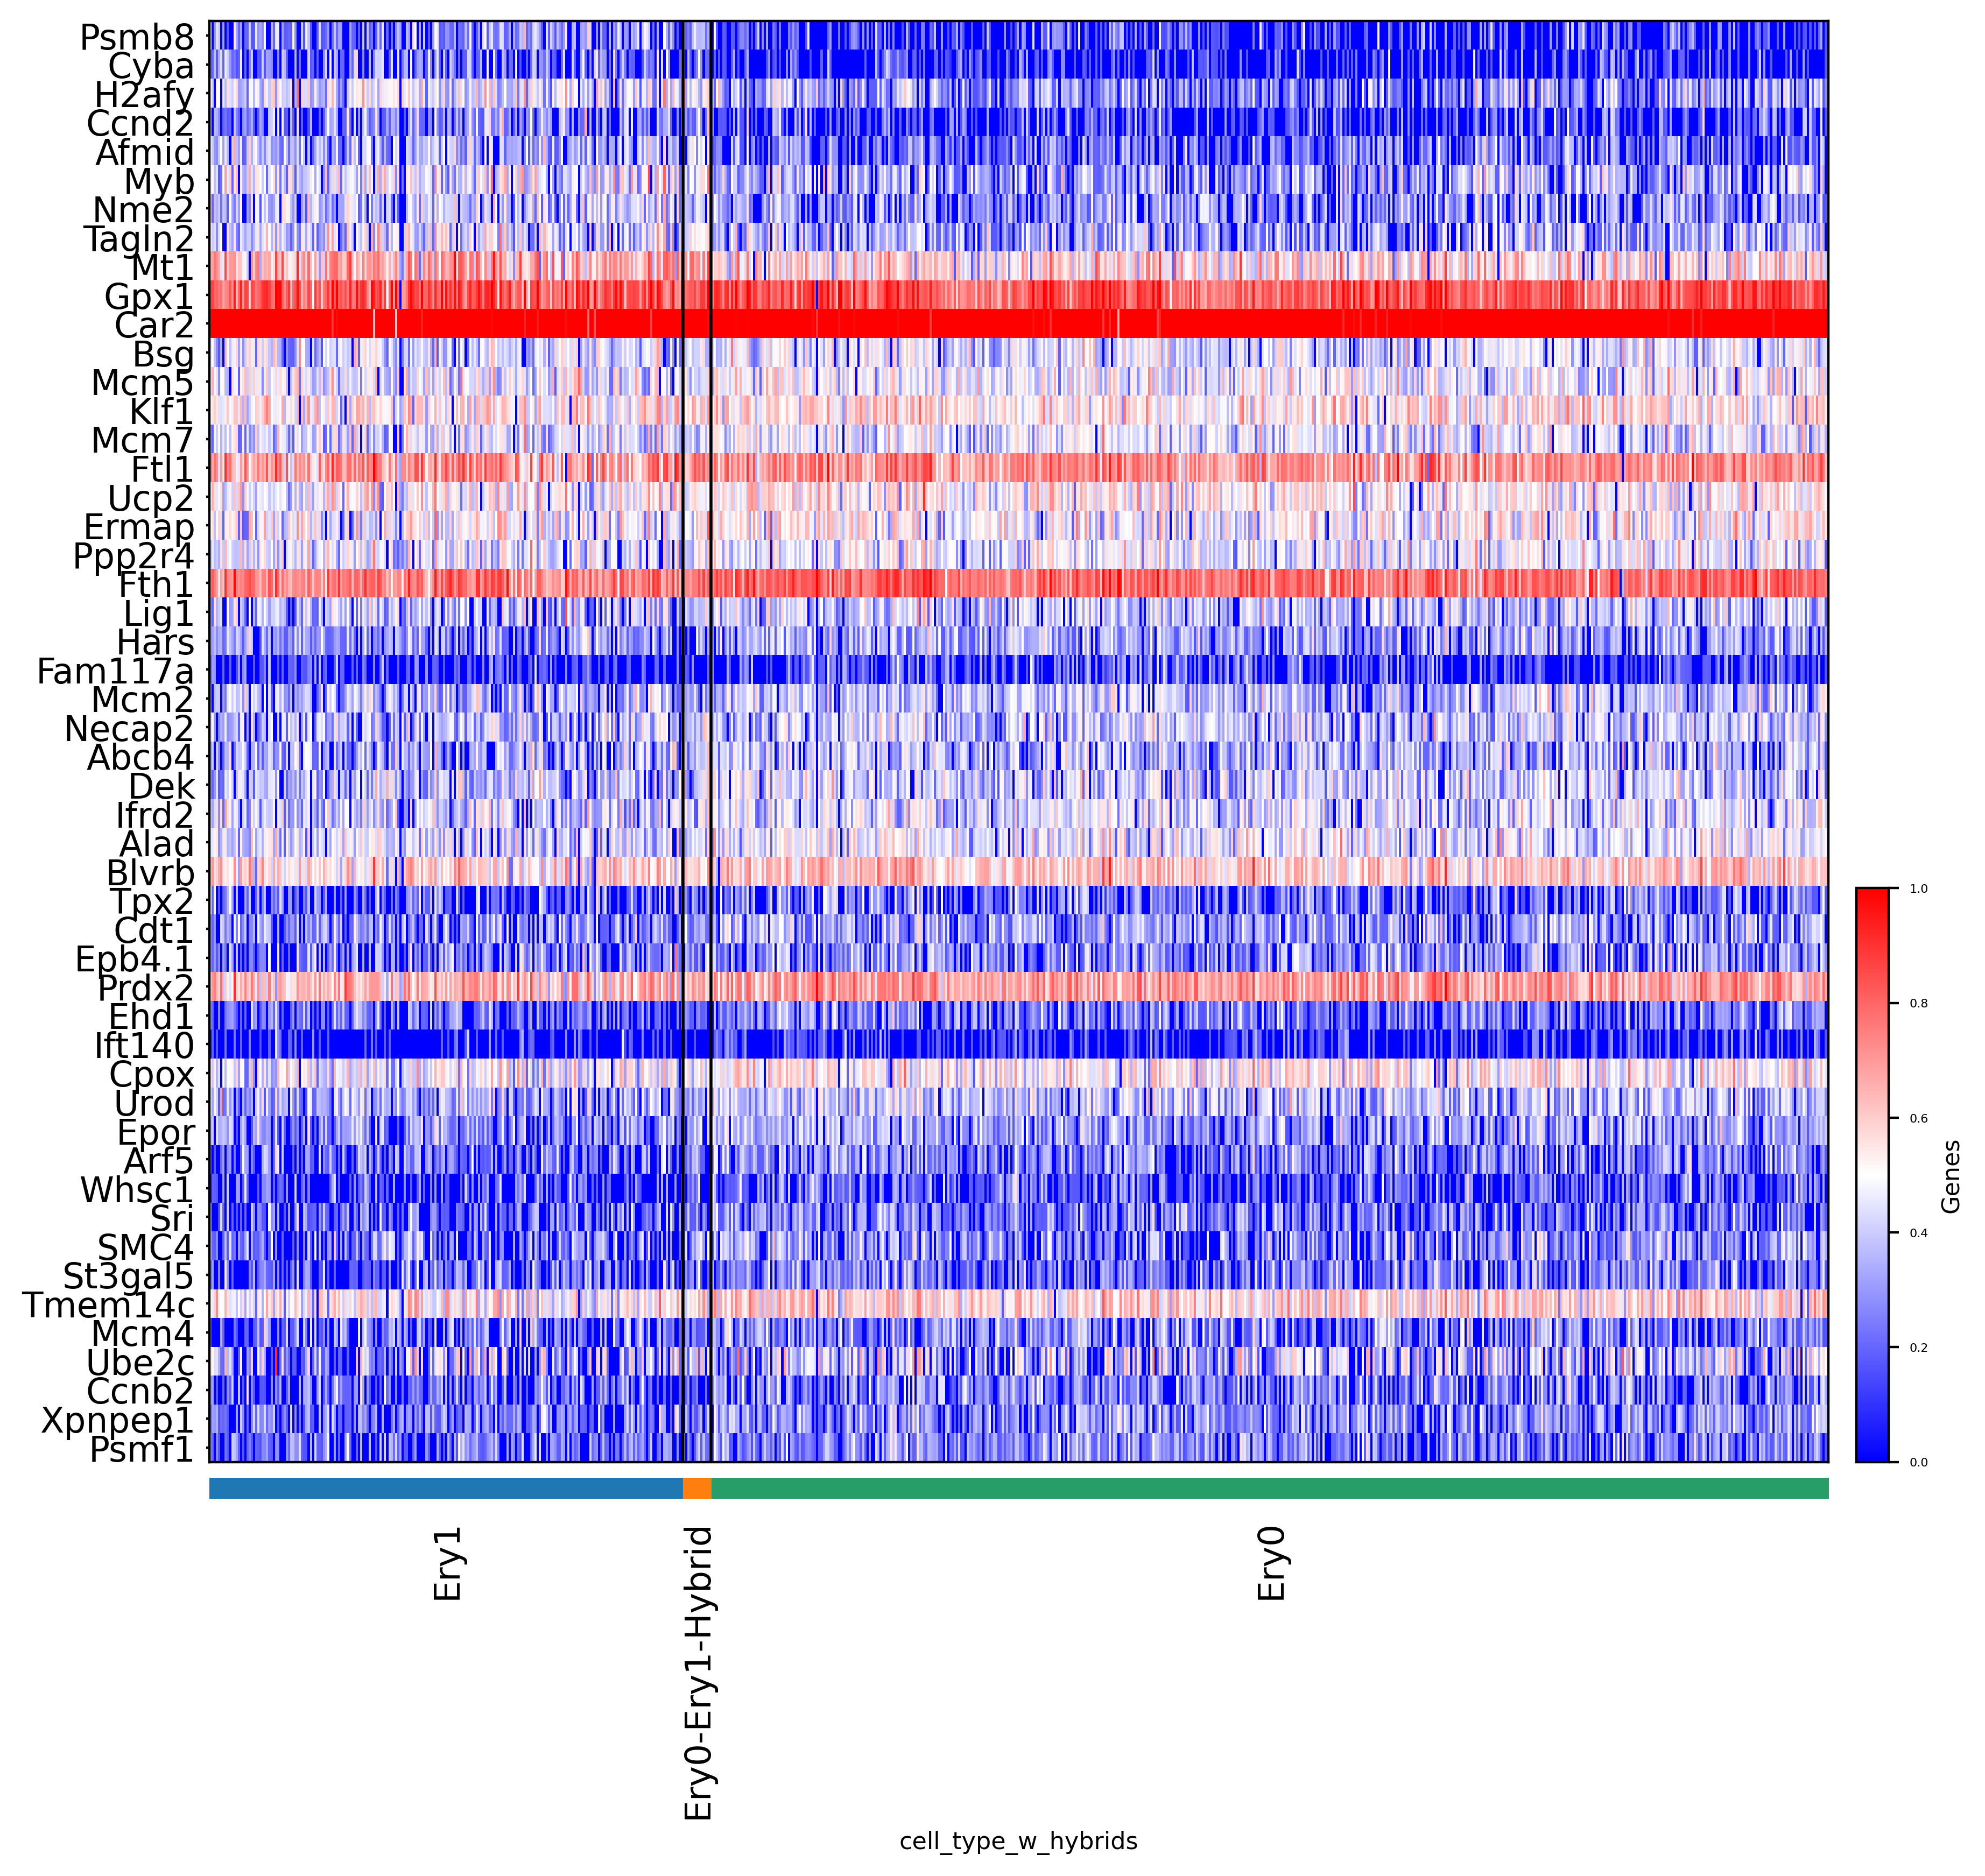

In [37]:
import matplotlib.pyplot as plt
from matplotlib import rc_context
import scanpy as sc
import numpy as np

# # Sort cells by pseudotime
# sorted_adata = filtered_adata[np.argsort(filtered_adata.obs['dpt_pseudotime'])]
# sorted_adata_final = sorted_adata[np.argsort(sorted_adata.obs['custom_order'])]


# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (9, 6),
    "xtick.labelsize": 2,
    "ytick.labelsize": 2,
    "axes.labelsize": 8,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Generate the heatmap plot with sorted cells
    sc.pl.heatmap(
        sorted_adata,
        var_names=specific_genes_sorted[:50],  # Use the top genes you identified
        groupby='cell_type_w_hybrids',  # Group cells by pseudotime
        swap_axes=True,
        cmap="bwr",
        #categories_order=['Ery1','Ery0-Ery1-Hybrid', 'Ery0'],
        use_raw=False,
        standard_scale='obs',
        show=False,  # Do not show the plot immediately
    )

    # Get the current figure and axis
    fig = plt.gcf()
    ax = plt.gca()

    # Customize the plot further using matplotlib
    # ax.set_title("Top Differentially Expressed Genes Across Pseudotime", fontsize=8)
    ax.set_xlabel("Pseudotime (Cells Sorted by Pseudotime)", fontsize=16)
    ax.set_ylabel("Genes", fontsize=8)

    # Optionally customize the tick parameters
    ax.tick_params(axis='x', labelsize=3, rotation=90)
    ax.tick_params(axis='y', labelsize=4)

    # Save the plot
    plt.savefig("./output/DGE/1_Ery0-Ery1-Hybrid/heatmap_sorted_by_pseudotime_and_lf2.png", bbox_inches='tight')
    plt.show()

In [39]:
sorted_adata.obs

paul15_clusters  n_counts_all louvain louvain_anno cell_type  \
1323            4Ery        5468.0      15           15      Ery1   
1777            5Ery        3499.0       6            6      Ery1   
673             2Ery        3445.0       6            6      Ery1   
674             5Ery        4216.0       6            6      Ery1   
682             4Ery        4209.0       6            6      Ery1   
...              ...           ...     ...          ...       ...   
1116            2Ery        2274.0       5            5      Ery0   
1132            4Ery        8590.0       3            3      Ery0   
1134            2Ery        6801.0      17           17      Ery0   
1093            2Ery        3622.0      10       10/Ery      Ery0   
2729            3Ery        6401.0       3            3      Ery0   

      dpt_pseudotime cell_type_w_hybrids custom_order  
1323        0.651510                Ery1            0  
1777        0.767270                Ery1            0  
673         0.695106                Ery1            0  
674         0.718908                Ery1            0  
682         0.608382                Ery1            0  
...              ...                 ...          ...  
1116        0.655595                Ery0            2  
1132        0.695189                Ery0            2  
1134        0.850035                Ery0            2  
1093        0.654110                Ery0            2  
2729        0.762039                Ery0            2  

[742 rows x 8 columns]

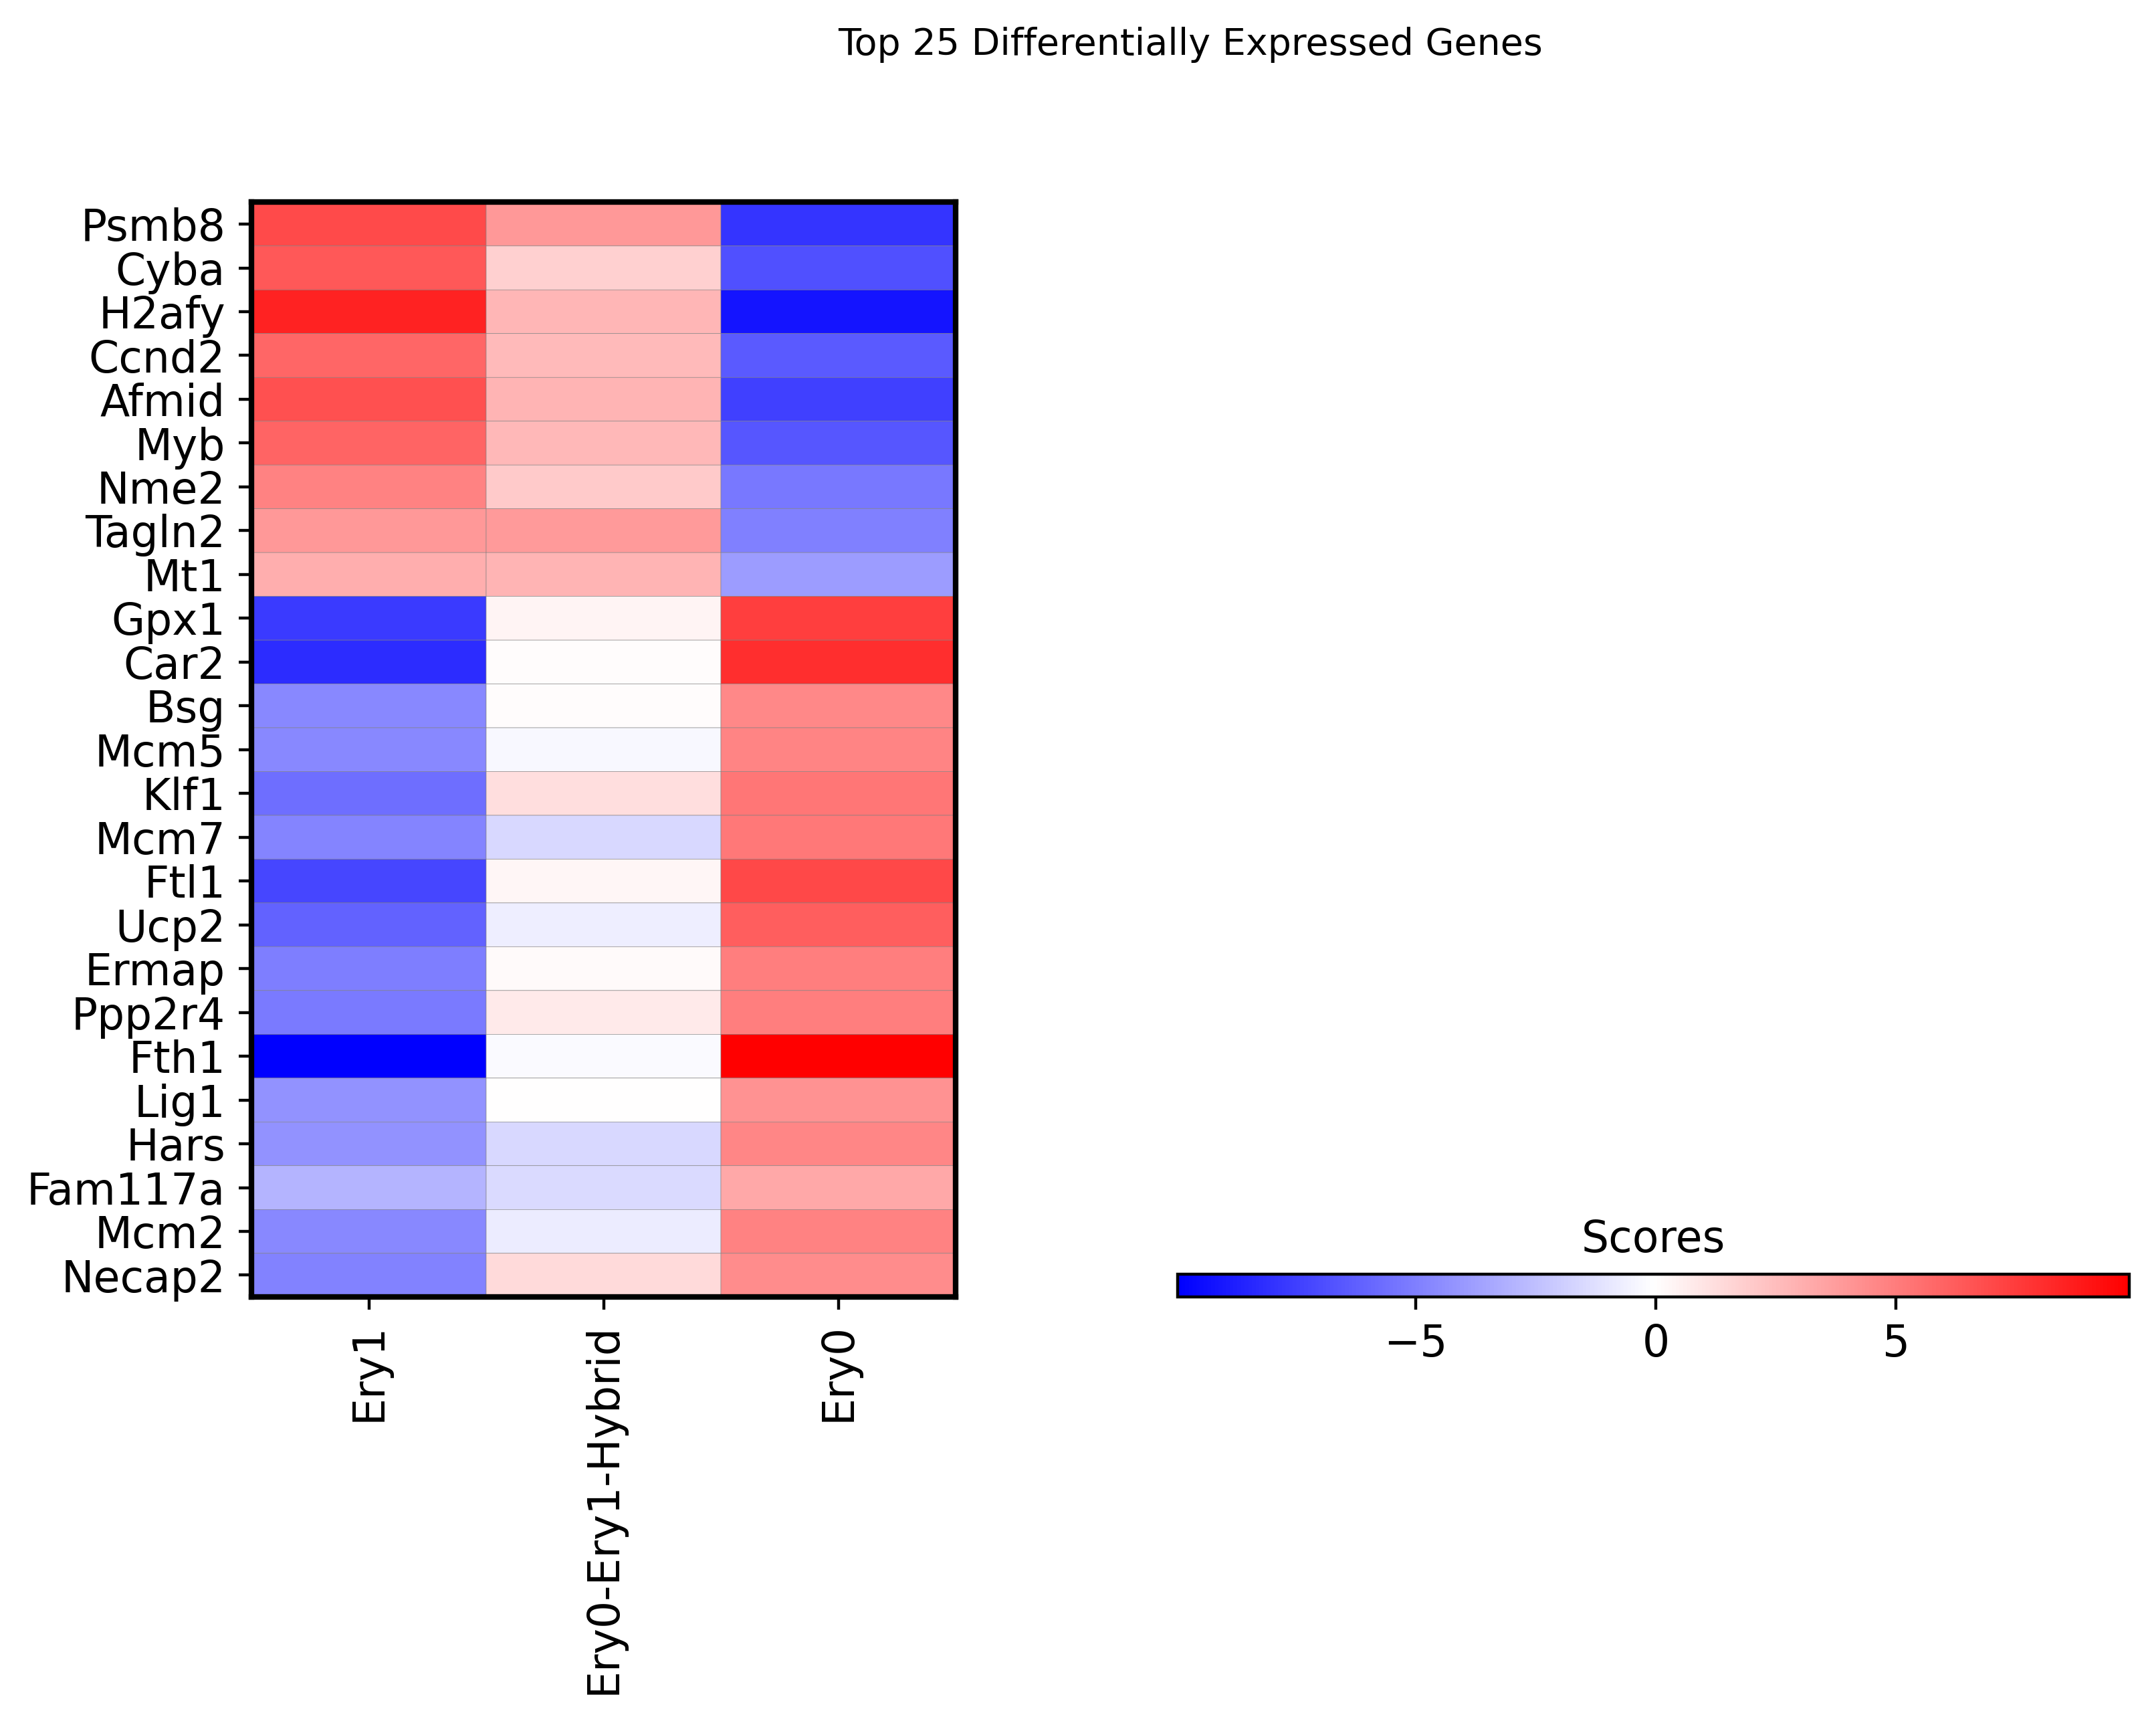

In [40]:
import matplotlib.pyplot as plt
# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (9, 6),
    "xtick.labelsize": 0.5,
    "ytick.labelsize": 0.5,
    "axes.labelsize": 0.5,  # Font size for axis labels
    "axes.titlesize": 2   # Font size for titles
}):
    # Generate the matrix plot and get the figure and axis objects
    fig, ax = plt.subplots()
    sc.pl.rank_genes_groups_matrixplot(
        sorted_adata,
        var_names=specific_genes_sorted[:25],
        values_to_plot="scores",
        ax=ax,
        cmap="bwr",
        categories_order=['Ery1','Ery0-Ery1-Hybrid', 'Ery0'],
        min_logfoldchange=3,
        show=False,  # Do not show the plot immediately
        dendrogram=False,
        swap_axes=True,
        colorbar_title='Scores'
    )
    
    # Customize the plot further using matplotlib
    ax.set_title("Top 25 Differentially Expressed Genes", fontsize=10)
    ax.set_xlabel("Cell Types/Clusters", fontsize=4)
    ax.set_ylabel("Genes", fontsize=2)
    
    # Optionally customize the tick parameters
    ax.tick_params(axis='x', labelsize=0.2, rotation=45)
    ax.tick_params(axis='y', labelsize=0.5,size=2)
    
    # Save the plot
    plt.savefig("./output/DGE/1_Ery0-Ery1-Hybrid/matrixplot_sorted_by_pdt_and_lf2.png",bbox_inches='tight')
    plt.show()

In [41]:
filtered_adata_new = sc.read_h5ad("./output/DGE/1_Ery0-Ery1-Hybrid/adata.h5ad")

In [42]:
# 1. Perform normalization (normalize counts to sum to 10,000 per cell)
sc.pp.log1p(filtered_adata_new)
sc.pp.scale(filtered_adata_new)

In [43]:
sorted_adata_new = filtered_adata_new[np.argsort(filtered_adata_new.obs['dpt_pseudotime'])]

In [44]:
# Define the desired order for the cell types
desired_order = ['Ery1', 'Ery0-Ery1-Hybrid', 'Ery0']

# Convert 'cell_type_w_hybrids' to a categorical type with the desired order
sorted_adata_new.obs['cell_type_w_hybrids'] = pd.Categorical(
    sorted_adata_new.obs['cell_type_w_hybrids'],
    categories=desired_order,
    ordered=True
)

# Sort cells by the custom order
sorted_adata_new_2 = sorted_adata_new[np.argsort(sorted_adata_new.obs['cell_type_w_hybrids'].cat.codes)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


In [45]:
sorted_adata_new_2.obs

paul15_clusters  n_counts_all louvain louvain_anno cell_type  \
1182            5Ery        3047.0       6            6      Ery1   
55              3Ery        2857.0       6            6      Ery1   
2397            4Ery        3685.0      15           15      Ery1   
322             5Ery        2544.0       6            6      Ery1   
2518            3Ery        3515.0      15           15      Ery1   
...              ...           ...     ...          ...       ...   
2126            2Ery        3288.0       5            5      Ery0   
2075            2Ery        2347.0       5            5      Ery0   
492             2Ery        2229.0       5            5      Ery0   
1239            3Ery       11366.0       3            3      Ery0   
35              1Ery        2516.0      10       10/Ery      Ery0   

      dpt_pseudotime cell_type_w_hybrids  
1182        0.532200                Ery1  
55          0.677305                Ery1  
2397        0.678033                Ery1  
322         0.678654                Ery1  
2518        0.678864                Ery1  
...              ...                 ...  
2126        0.727913                Ery0  
2075        0.727708                Ery0  
492         0.727639                Ery0  
1239        0.738083                Ery0  
35          1.000000                Ery0  

[742 rows x 7 columns]

In [58]:
genes_for_heatmap = Ery0_top10.sort_values(by='logfoldchanges', ascending=False)['names']

In [59]:
genes_for_heatmap = genes_for_heatmap.append(Ery0_Ery1_Hybrid_top10.sort_values(by='logfoldchanges', ascending=False)['names'])

In [60]:
genes_for_heatmap = genes_for_heatmap.append(Ery1_top10.sort_values(by='logfoldchanges', ascending=False)['names'])

In [56]:
genes_for_heatmap

1     Hba-a2
0       Ctse
4      Hemgn
8      Isg20
5       Hmbs
7        Rhd
2    Fam132a
9    Tmem14c
3      Prdx2
6       Fth1
5       Ass1
9       Apoe
3    S100a10
4       Cyba
6    Arhgdib
1      Psmb8
8      Ccnd2
0      H2afy
2      Afmid
7        Myb
0      Psmb8
4    Fam168b
1     Tagln2
2     Mthfd1
3       Rcc2
Name: names, dtype: object

In [50]:
genes_for_heatmap_lf = Ery0['names'].append( Ery1['names'])

In [51]:
list(set(genes_for_heatmap_lf))

['Kit',
 'Ppif',
 'Vamp5',
 'Hpn',
 'Slc25a38',
 'Dhrs11',
 'Pla2g12a',
 'Arhgdib',
 'Ifitm2',
 'Ramp1',
 'Ipo4',
 'Por',
 'Flna',
 'Sec14l2',
 'Laptm5',
 'Khk',
 '1190002H23Rik',
 'Tmem14c',
 'Ank1',
 'Cpox',
 'Ftl1',
 'Hmbs',
 'Reep5',
 'Fam132a',
 'Add2',
 'Grina',
 'Def6',
 'Hba-a2',
 'Icam2',
 'Ass1',
 'Phgdh',
 'Erp29',
 'Kcng2',
 'Prdx2',
 'Gpi1',
 'Dock2',
 'Ubac1',
 'Pdxk',
 'Birc5',
 'Rhd',
 '1110002B05Rik',
 'H2afy',
 'Hsd17b12',
 'Myb',
 'Cbfa2t3',
 'Ccne1',
 'Ripk3',
 'Crip1',
 'Blvrb',
 'Frat2',
 'Gata2',
 'Grb2',
 'Ap1b1',
 'Urod',
 'Cd82',
 'Nme2',
 'Cyba',
 'Myc',
 'Kcnab2',
 'Prdx6',
 'Cd24a',
 'Fads3',
 'S100a10',
 'Sphk1',
 'Gypa',
 'Fth1',
 'Cldn13',
 'Psmb8',
 'Spnb1',
 'Gpx1',
 'Cited4',
 'Mybbp1a',
 'Gna15',
 'Car1',
 'Isg20',
 'Tspan33',
 'Ptprcap',
 'G6pc3',
 'Ptprs',
 'Hemgn',
 'Mt1',
 'Lmna',
 'Ifrd2',
 'Sh2d4a',
 'Ebna1bp2',
 'Car2',
 'Ccnd2',
 'Apoe',
 'Rrm2',
 'Alad',
 'Ctse',
 'Hp1bp3',
 'Txnrd2',
 'Mgll',
 'Afmid',
 'Tagln2',
 'Emp3',
 'Crip2',
 'Stard1

In [51]:
# Assuming you have an AnnData object `adata` and a list of genes `gene_list`
# Make sure all genes in `gene_list` are in `adata.var_names`
genes_in_adata = sorted_adata_new_2.var_names

# Extract the expression data for the selected genes
expression_data = sorted_adata_new_2.X

# If the data is sparse, convert it to dense matrix
if isinstance(expression_data, np.ndarray) == False:
    expression_data = expression_data.toarray()

# Z-score normalization per gene
# Calculate the mean and standard deviation per gene (column-wise)
mean_expression = np.mean(expression_data, axis=0)
std_expression = np.std(expression_data, axis=0)

# Apply z-score normalization (subtract mean, divide by std dev)
z_score_normalized_data = (expression_data - mean_expression) / std_expression

# Now z_score_normalized_data contains the normalized expression for each gene
# You can create a DataFrame for visualization or further analysis
df_normalized = pd.DataFrame(z_score_normalized_data, columns=genes_in_adata)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [52]:
# Add the z-score normalized data as a new layer in the AnnData object
sorted_adata_new_2.layers['z_score_normalized'] = z_score_normalized_data

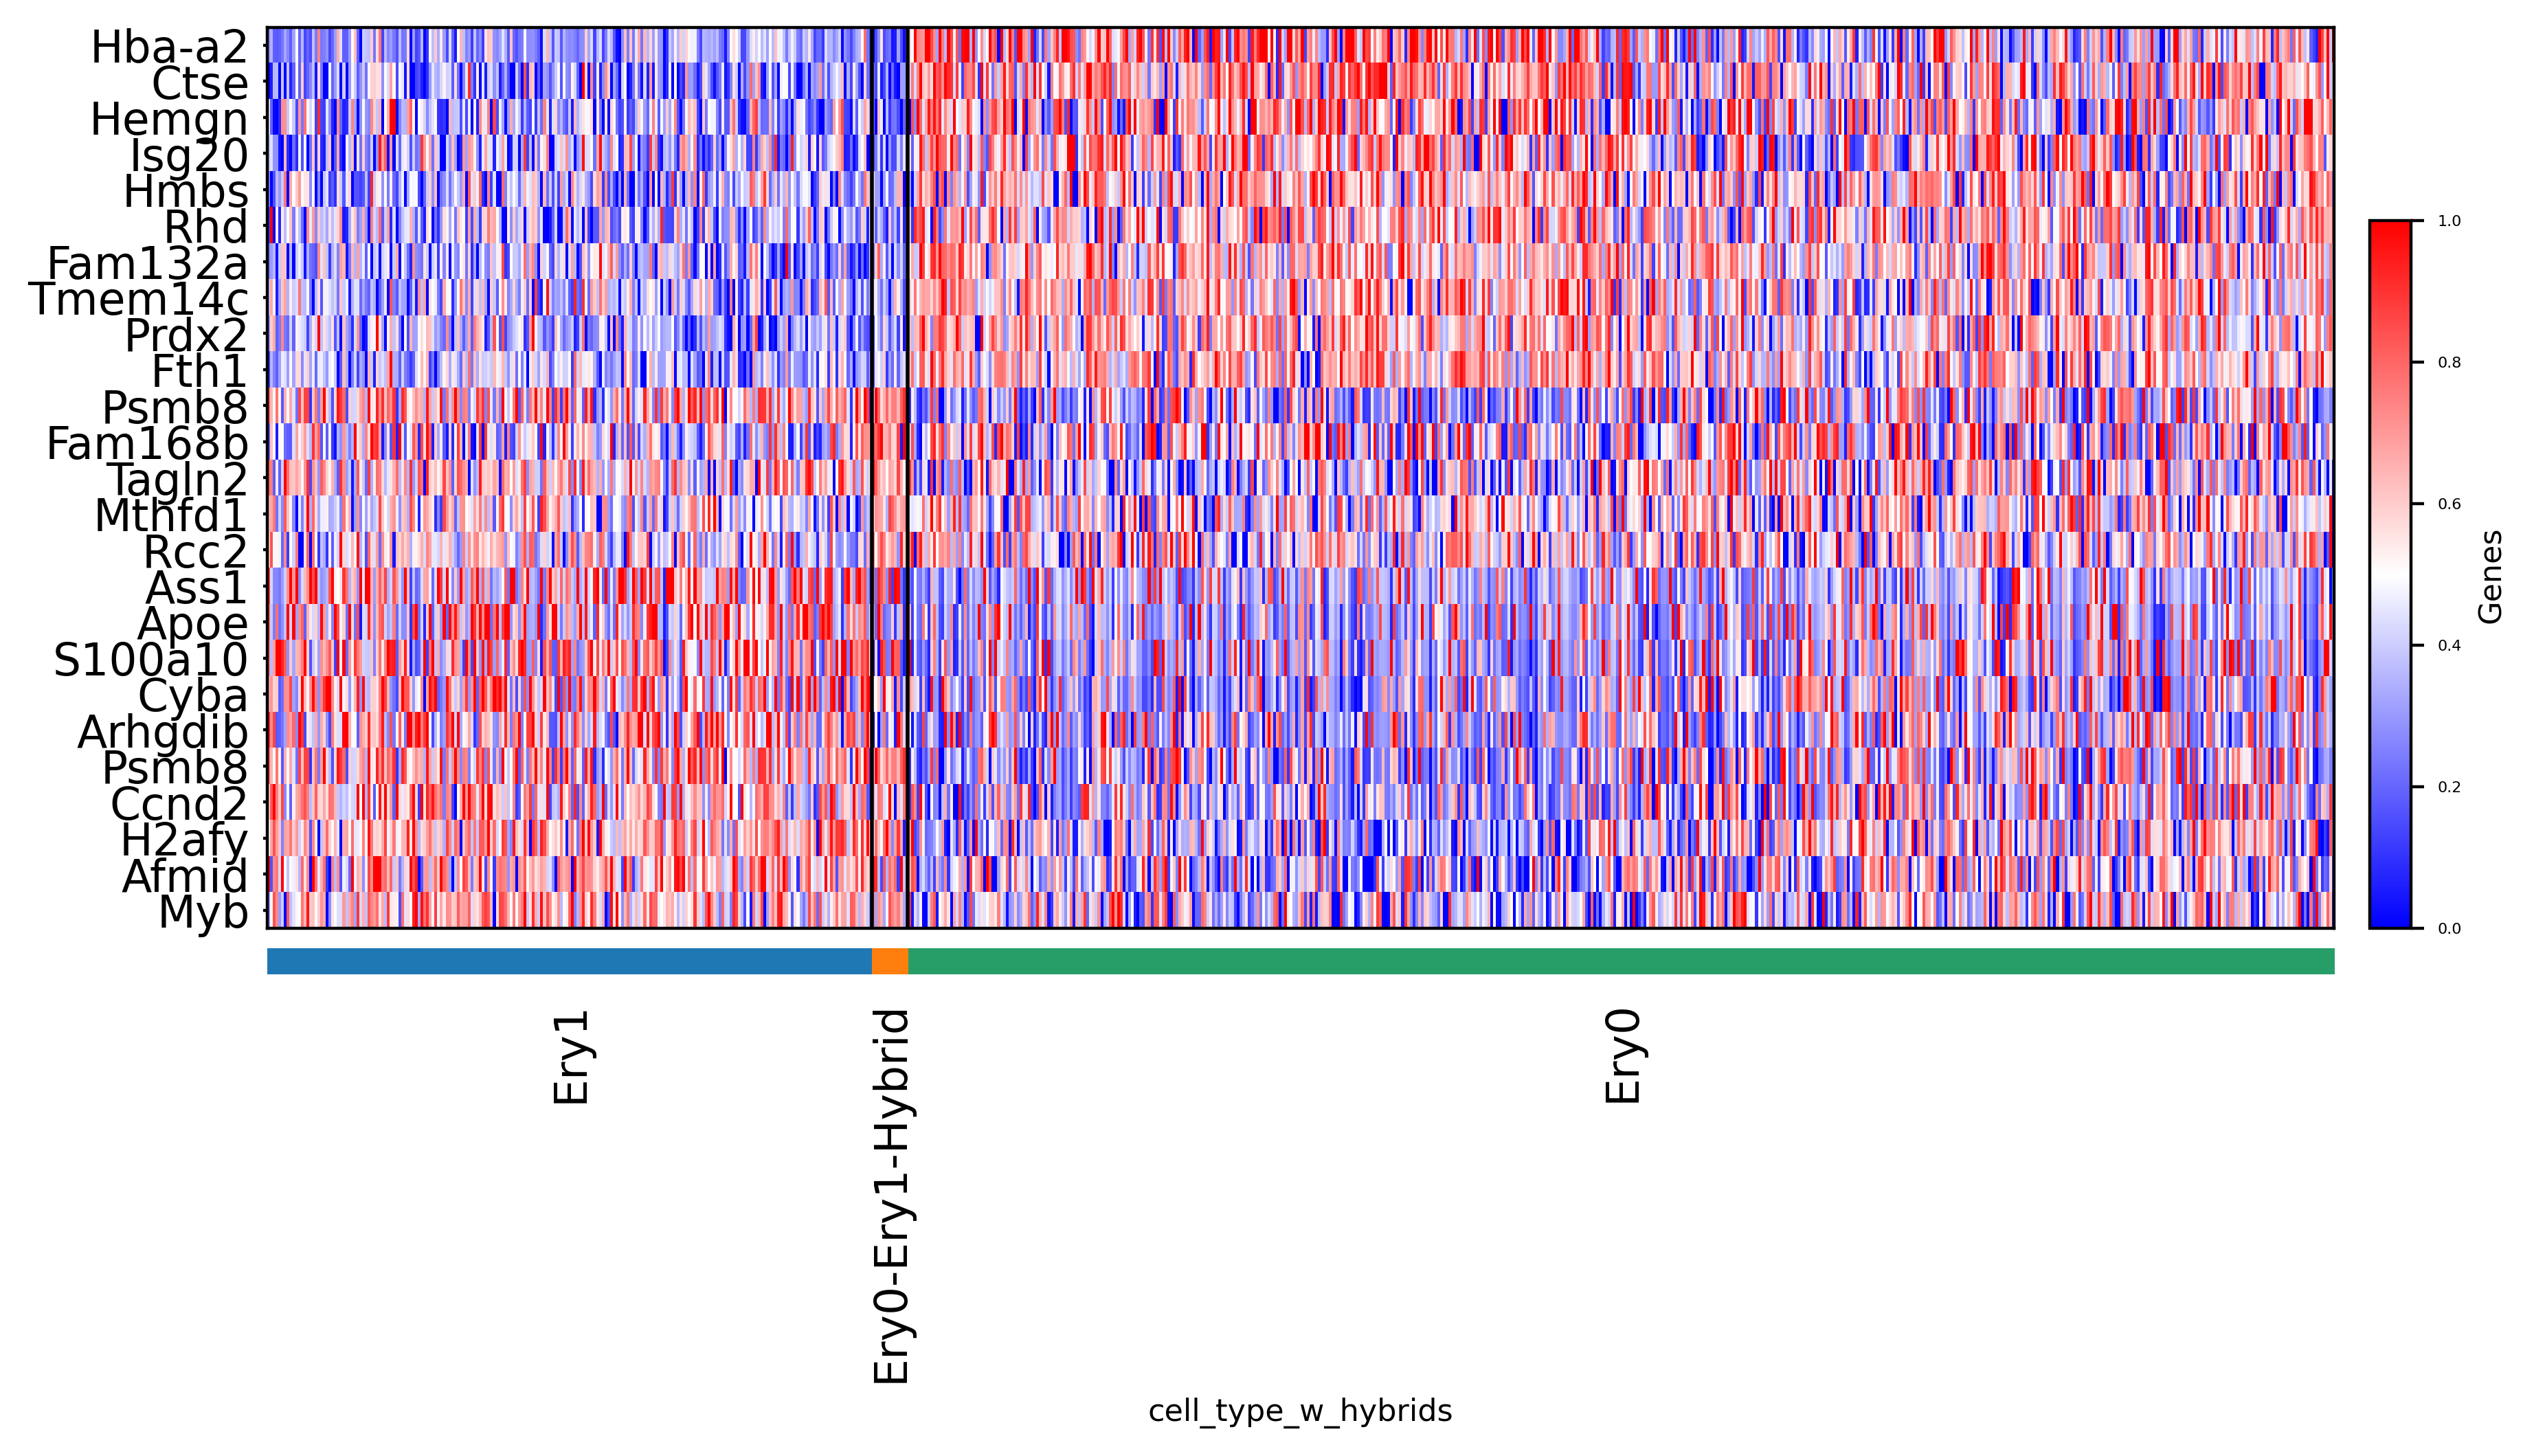

In [63]:
import matplotlib.pyplot as plt
from matplotlib import rc_context
import scanpy as sc
import numpy as np

# # Sort cells by pseudotime
# sorted_adata = filtered_adata[np.argsort(filtered_adata.obs['dpt_pseudotime'])]
# sorted_adata_final = sorted_adata[np.argsort(sorted_adata.obs['custom_order'])]


# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (9, 6),
    "xtick.labelsize": 2,
    "ytick.labelsize": 2,
    "axes.labelsize": 8,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Generate the heatmap plot with sorted cells
    sc.pl.heatmap(
        sorted_adata_new_2,
        var_names=genes_for_heatmap,  # Use the top genes you identified
        groupby='cell_type_w_hybrids',  # Group cells by pseudotime
        swap_axes=True,
        cmap="bwr",
        standard_scale='obs',
        show=False,  # Do not show the plot immediately
    )

    # Get the current figure and axis
    fig = plt.gcf()
    ax = plt.gca()

    # Customize the plot further using matplotlib
    # ax.set_title("Top Differentially Expressed Genes Across Pseudotime", fontsize=8)
    ax.set_xlabel("Pseudotime (Cells Sorted by Pseudotime)", fontsize=16)
    ax.set_ylabel("Genes", fontsize=8)

    # Optionally customize the tick parameters
    ax.tick_params(axis='x', labelsize=3, rotation=90)
    ax.tick_params(axis='y', labelsize=4)

    # Save the plot
    #plt.savefig("./output/DGE/1_Ery0-Ery1-Hybrid/heatmap_sorted_by_pseudotime_and_lf2.png", bbox_inches='tight')
    plt.show()

In [127]:
adata_for_heatmap = sc.read_h5ad("./output/DGE/1_Ery0-Ery1-Hybrid/adata.h5ad")

In [130]:
# scale and store results in layer
adata_for_heatmap.layers["scaled"] = sc.pp.scale(adata_for_heatmap, copy=True).X

In [136]:
sc.tl.rank_genes_groups(adata_for_heatmap,groupby="cell_type_w_hybrids")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [139]:
import matplotlib.pyplot as plt
from matplotlib import rc_context
import scanpy as sc
import numpy as np

# # Sort cells by pseudotime
# sorted_adata = filtered_adata[np.argsort(filtered_adata.obs['dpt_pseudotime'])]
# sorted_adata_final = sorted_adata[np.argsort(sorted_adata.obs['custom_order'])]


# Set the figure size and font sizes for tick labels, axis labels, and titles
with rc_context({
    "figure.figsize": (9, 6),
    "xtick.labelsize": 2,
    "ytick.labelsize": 2,
    "axes.labelsize": 8,  # Font size for axis labels
    "axes.titlesize": 8   # Font size for titles
}):
    # Generate the heatmap plot with sorted cells
    sc.pl.rank_genes_groups_heatmap(
        adata_for_heatmap,
        var_names=list(set(genes_for_heatmap_lf)) - ['Ubac1'],  # Use the top genes you identified
        groupby='cell_type_w_hybrids',  # Group cells by pseudotime
        swap_axes=True,
        cmap="bwr",
        show=False  # Do not show the plot immediately
    )

    # Get the current figure and axis
    fig = plt.gcf()
    ax = plt.gca()

    # Customize the plot further using matplotlib
    # ax.set_title("Top Differentially Expressed Genes Across Pseudotime", fontsize=8)
    ax.set_xlabel("Pseudotime (Cells Sorted by Pseudotime)", fontsize=16)
    ax.set_ylabel("Genes", fontsize=8)

    # Optionally customize the tick parameters
    ax.tick_params(axis='x', labelsize=3, rotation=90)
    ax.tick_params(axis='y', labelsize=4)

    # Save the plot
    #plt.savefig("./output/DGE/1_Ery0-Ery1-Hybrid/heatmap_sorted_by_pseudotime_and_lf2.png", bbox_inches='tight')
    plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'list'

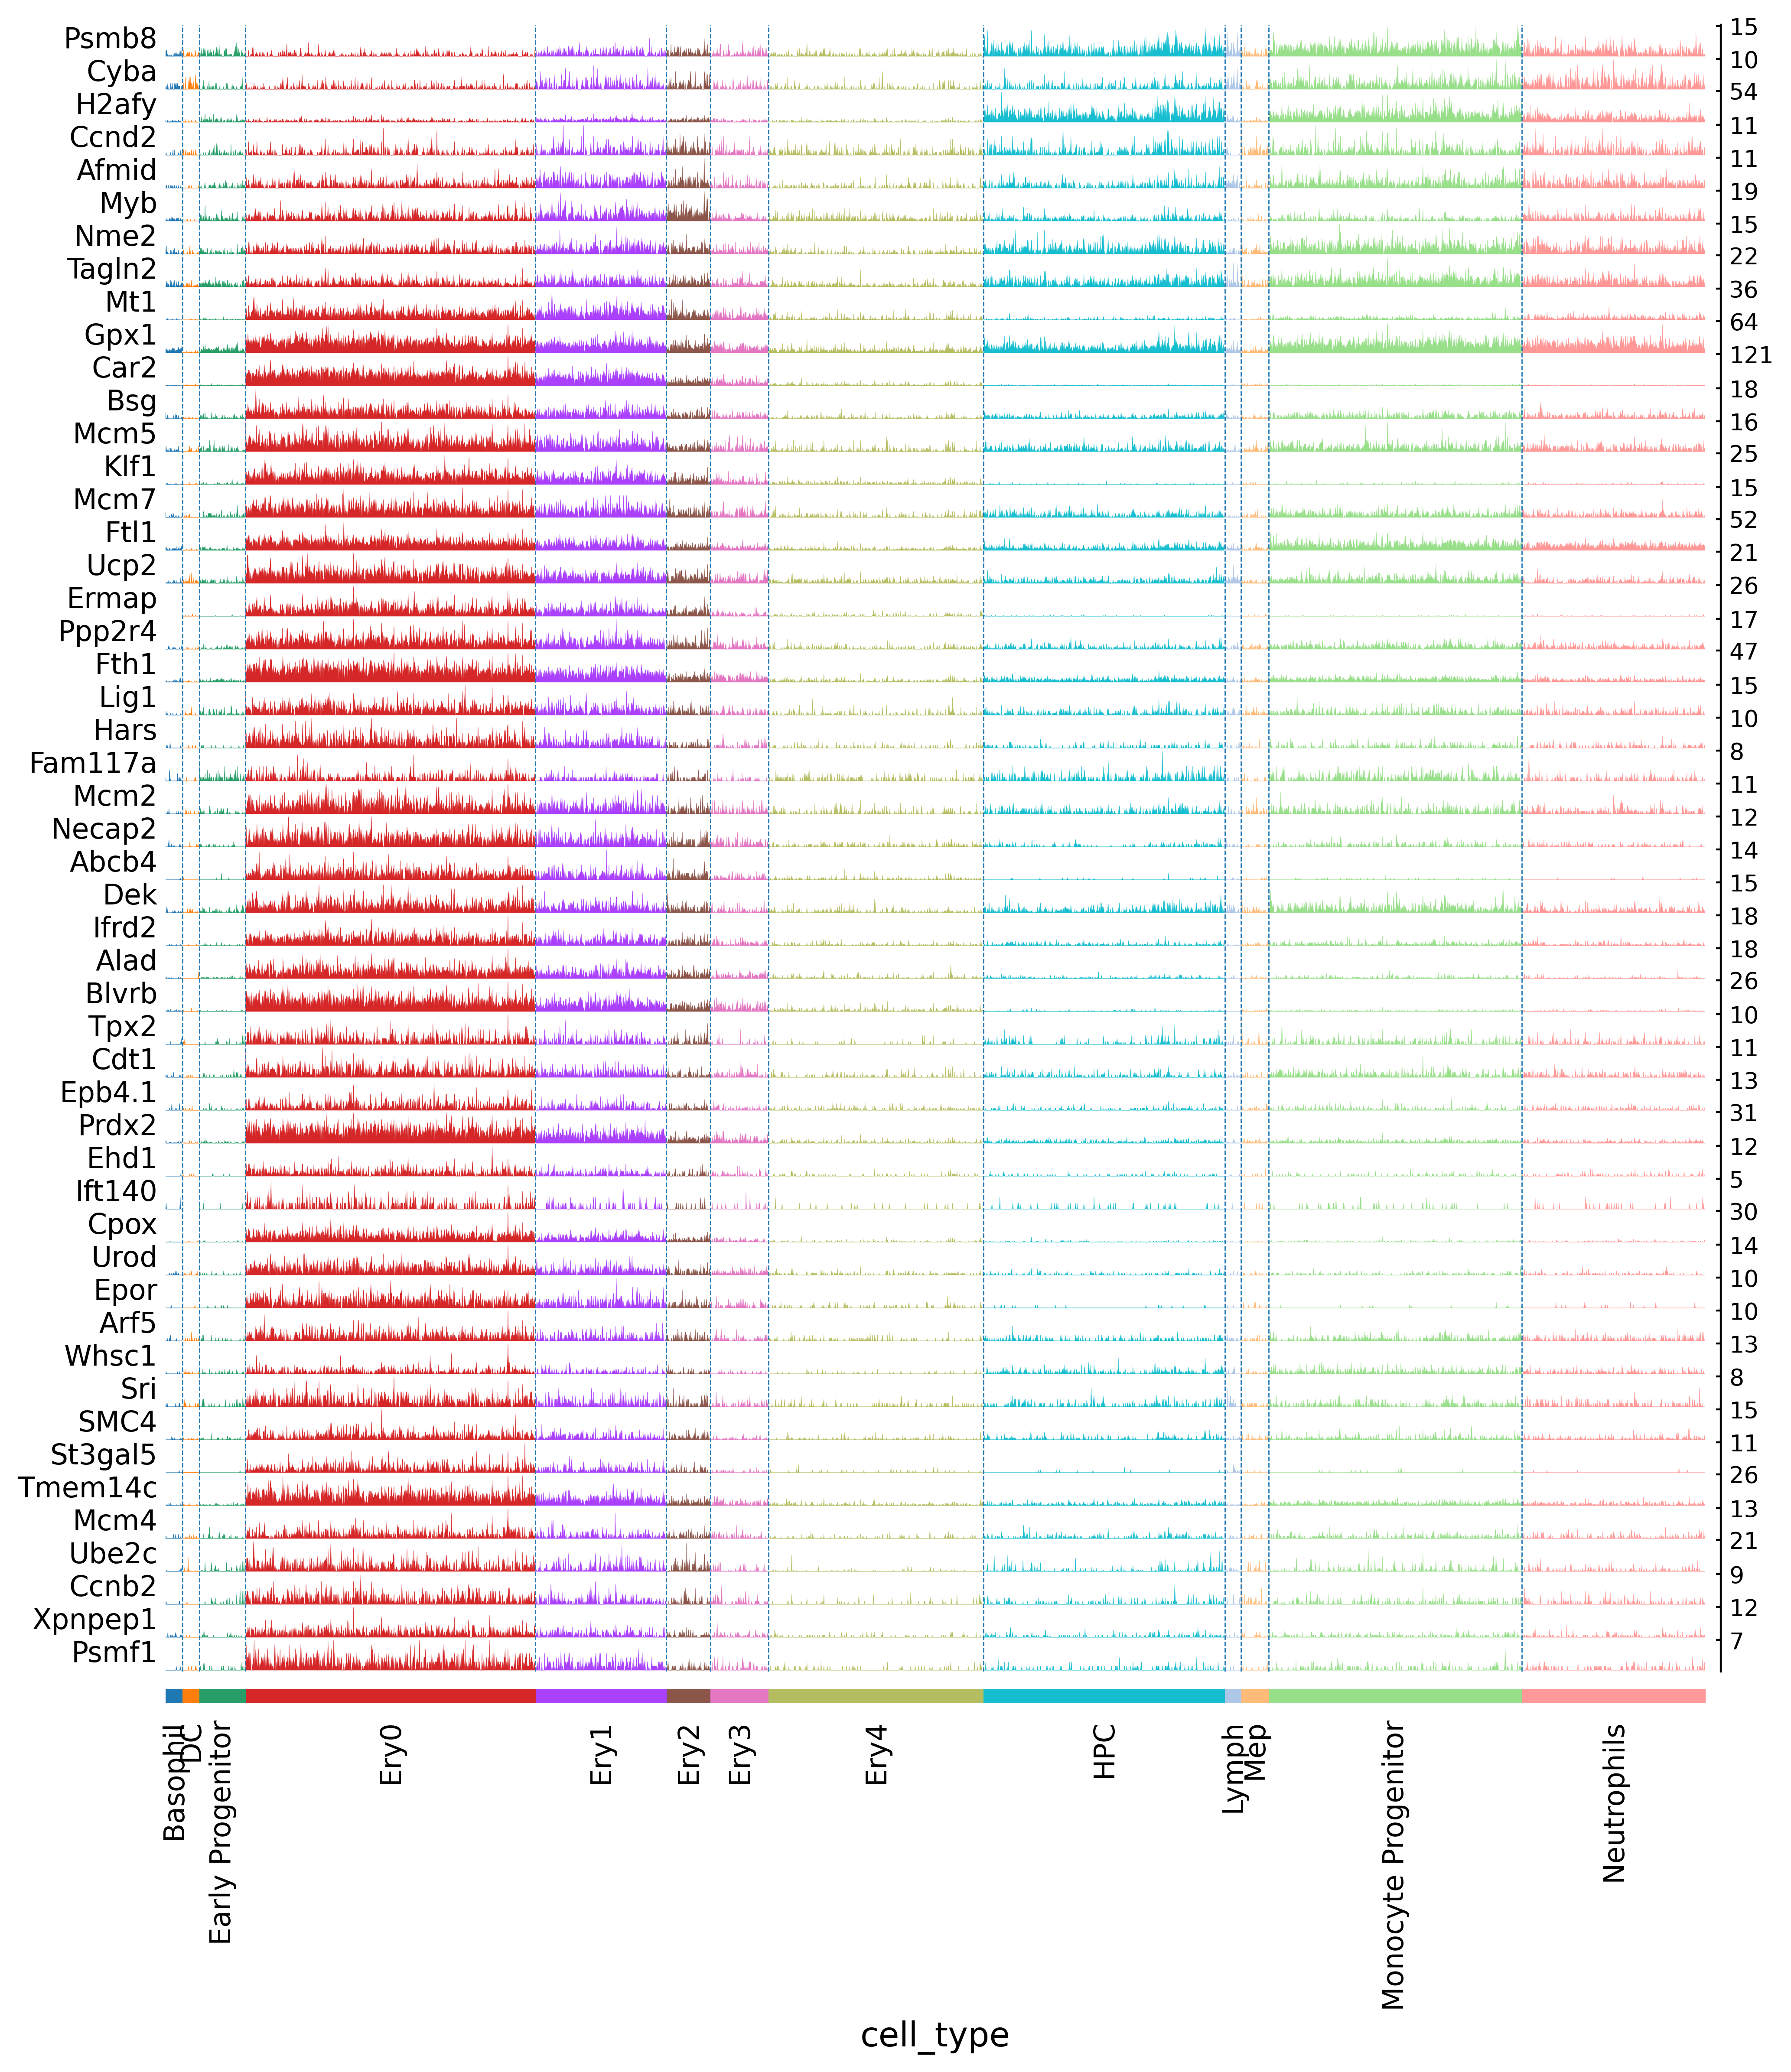

In [84]:
sc.pl.tracksplot(adata_raw,var_names=specific_genes_sorted[:50], groupby="cell_type")

In [67]:
adata_for_heatmap.

OverloadedDict, wrapping:
	{'iroot': 840}
With overloaded keys:
	['neighbors'].